In [298]:
# importing the necessary libraries
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

<img src="http://drive.google.com/uc?export=view&id=18q7KL4aV6McMtaid_1Let2aGkw6d4QYn" width=45%>

In [299]:
class GridWorld:
    """
    The gridworls is a frequently used demo environment in reinforcement learning
    to try and test ideas.
    Today, we will use it to understand the concepts so far.
    
    The environment: (see image)
    * cells: the agent can step on a cell. There is exactly one cell to start from.
    This is the top left corner. There is one terminal cell where the walking ends, 
    the agent can not leave it (blue).
    * obstacles: there are cells where the agent can not step. (gray)
    * agent: it can move from one cell to an other neighboring cell. 
    Possible directions: up, down, left, right. Each transition happens with probability 1.
    * reward: after each transition the agent receives -1 point. In the terminal cell, no reward
    received anymore.
    
    Implement the environment below!
    """
    def __init__(self, size, start_cell, obstacles, terminating_state):
        self.size = size
        self.start = start_cell
        self.obstacles = obstacles
        self.termin = terminating_state
        self.current_cell = self.start
    
    def reset(self):
        # ----- reset the current cell to the start cell to start again -----
        self.current_cell = self.start
    
    def transition(self, cell, action):
        # ----- IMPLEMENT FUNCTION -----
        # cell = (row, column) indices
        # action: 0 left, 1 up, 2 right, 3 down
        # returns: What will be the next state
        # Take care of the borders of the grid!
        
        # Checking for typical edge cases of terminal
        if cell == self.termin:
            self.current_cell = cell
            return cell
        
        # If not then let's go...
        r_next, c_next = cell[0], cell[1]  # Getting cell states in vars
        
        # if action is "left"
        if action == 0:
            if c_next != 0 :                 # Considering corner case
                c_next = c_next - 1
                
        # if action is "up"
        elif action == 1:
             if r_next != 0:                 # Considering corner case
                r_next = r_next - 1
                
        # if action is "right"
        elif action == 2:
             if c_next != self.size[1] - 1:  # Considering corner case
                c_next = c_next + 1
                
                
        # if action is "down"
        elif action == 3:
             if r_next != self.size[0] - 1:  # Considering corner case
                r_next = r_next + 1
                
        # Check after transition there is an obstacle we will not move
        if (r_next, c_next) in self.obstacles:
                self.current_cell = cell
                return cell
                
        self.current_cell = (r_next, c_next)
        return (r_next, c_next) # Return the states

    def reward(self, cell, action):
        # ----- RETURN REWARD -----
        # -1 if not in the terminal state
        
        # As specified reward is "-1" in all the cases except terminal state
        if cell != self.termin:
            return -1
        else:
            return 0
    
    def in_terminal(self):
        return self.current_cell == self.termin

In [300]:
class DPsolver:
    """
    This solver is based on the Bellman-equation and it is 
    solved by iteratively.
    The action-value is used to represent the utility of the 
    actions and states.
    """

    def __init__(self, gridworld, gamma, iterations):
        # setting parametes according to the input parameters
        self.gridworld = gridworld
        self.gamma = gamma
        self.iterations = iterations
        size = gridworld.size
        # initialize accumulaters
        self.cntr = 0
        self.sum_rewards = []
        self.path = []
        # ----- initialize the table for Q-function -----
        self.q_table = np.zeros((4, size[0], size[1]), dtype=np.float32)
        # Defining states which are actually 4
        self.state = [0,1,2,3]
    
    
    def step(self):
        # ----- WRITE THE CODE BELOW -----
        # implement one step in the value iteration
        rows, cols = self.gridworld.size  # ask for the size of the grid
        # ----- cycle over the rows -----
        for r in range(rows):
            # ----- cycle over the columns -----
            for c in range(cols):
                # ----- cycle over the actions -----
                for act in self.state:
                    # ----- get the reward -----
                    reward = self.gridworld.reward((r,c), act)
                    # ----- calculate the corresponding next step (what would happen) -----
                    cell_next = self.gridworld.transition((r,c), act) #passing it into next function defined
                    #print(cell_next)
                    # Let's get the next state values
                    r2, c2 = cell_next[0], cell_next[1]
                    # ----- update the q-table -----
                    self.q_table[act, r, c] = reward + self.gamma * np.max(self.q_table[:, r2, c2]) # updating q table with reward and max value over row and cols
                    
        # increase the counter
        self.cntr = self.cntr +  1
        # add the return to the sum_rewards list
        self.sum_rewards.append(self.trajectory())

    def trajectory(self):
        # ----- IMPLEMENT THE FUNCTION -----
        # reset the gridworld
        self.gridworld.reset()

        # calculate the return along a trajectory followed by the current policy
        # when started from the start_cell

        # TODO
        sum_rewards = 0
        # This is taken for termination of the loop in order to stop iterations
        step = 0
        while not self.gridworld.in_terminal() and step < 10: # only 10 taken in steps
            r, c = self.gridworld.current_cell         # get the current cell
            action = np.argmax(self.q_table[:, r, c])  # update with argmax
            self.gridworld.transition((r, c), action)  # get the transition
            sum_rewards = sum_rewards +  self.gridworld.reward((r, c), action)  # Get the reward
            self.path.append((r, c))
            step = step + 1
#             if self.gridworld.in_terminal():
#                 print('terminal')
        return sum_rewards

    def is_learning_finished(self):
        # ----- IMPLEMENT THIS FUNCTION -----
        # check whether learning has finished, return it
        return self.cntr > self.iterations

In [301]:
def plot_learning_curve(ql):
    values = ql.sum_rewards
    x = list(range(len(values)))
    y = values
    plt.plot(x, y, 'ro')
    plt.show()

-8


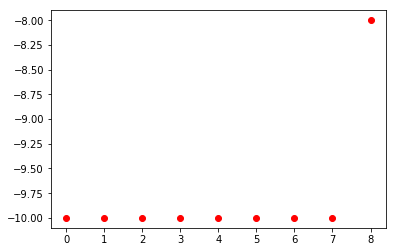

In [302]:
# grid world parameters
size = (6, 6)
start_cell = (0, 0)
obstacles = [(3, 3)]
terminating_state = (3, 5)
# q learning parameters
gamma = 0.9
# ----- What is the minimum required number of iterations? -----
"""
Since we see the reward is converging after some count we don't need much iterations 

"""
iterations = 8

gw = GridWorld(size, start_cell, obstacles, terminating_state)
solver = DPsolver(gw, gamma, iterations)

while not solver.is_learning_finished():
    solver.step()
    sum_rewards = solver.sum_rewards[-1]
   # print(sum_rewards)

sum_rewards = solver.trajectory()
print(sum_rewards)
plot_learning_curve(solver)

<div class="alert alert-block alert-success">
<b>Success:</b> The following has converged after 7 iterations which is minimal required to complete

*Let's see with more iterations*

-8


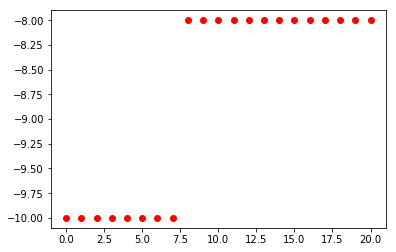

In [303]:
# grid world parameters
size = (6, 6)
start_cell = (0, 0)
obstacles = [(1,1), (3, 3)]
terminating_state = (3, 5)
# q learning parameters
gamma = 0.9
# ----- What is the minimum required number of iterations? -----
"""
Since we see the reward is converging after some count we don't need much iterations 

"""
iterations = 20

gw = GridWorld(size, start_cell, obstacles, terminating_state)
solver = DPsolver(gw, gamma, iterations)

while not solver.is_learning_finished():
    solver.step()
    sum_rewards = solver.sum_rewards[-1]
   # print(sum_rewards)

sum_rewards = solver.trajectory()
print(sum_rewards)
plot_learning_curve(solver)

**OBSERVATIONS**
<div class="alert alert-block alert-warning">

We see after terminal state is reached there is no effect on reward and it becomes constant

</div>